# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}units={units}&q={city}&appid={weather_api_key}"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
     
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nata
Processing Record 2 of Set 1 | saint-jean-de-monts
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | tocopilla
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | pervomays'kyy
Processing Record 18 of Set 1 | kangding
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                 nata   8.3333  -80.5167     27.65        85          84   
1  saint-jean-de-monts  46.7833   -2.0667     14.58        85           0   
2               kodiak  57.7900 -152.4072      7.73        93         100   
3    wailua homesteads  22.0669 -159.3780     27.44        75          20   
4            tocopilla -22.0920  -70.1979     18.49        76          18   

   Wind Speed Country        Date  
0        2.75      PA  1749344705  
1        8.63      FR  1749344706  
2        4.12      US  1749344707  
3        5.14      US  1749344709  
4        5.76      CL  1749344483

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
0                       nata   8.3333  -80.5167     27.65        85   
1        saint-jean-de-monts  46.7833   -2.0667     14.58        85   
2                     kodiak  57.7900 -152.4072      7.73        93   
3          wailua homesteads  22.0669 -159.3780     27.44        75   
4                  tocopilla -22.0920  -70.1979     18.49        76   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                84        2.75      PA  1749344705  
1                 0        8.63      FR  1749344706  
2               100        4.12      US  1749344707  
3                20        5.14      US  1749344709  
4                18        5.76      CL  1749344483

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

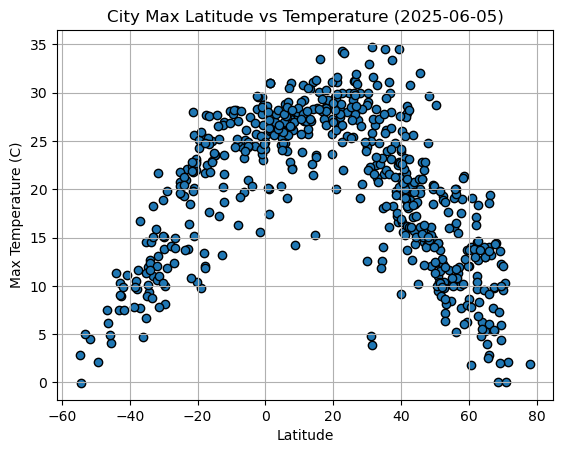

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black',  marker="o")

# Incorporate the other graph properties 
plt.title("City Max Latitude vs Temperature (2025-06-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

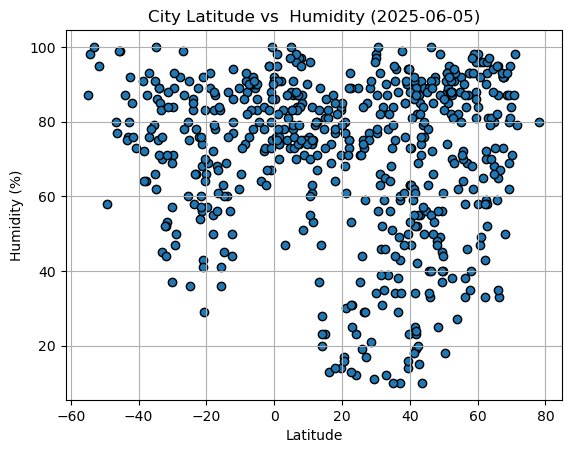

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Humidity (2025-06-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

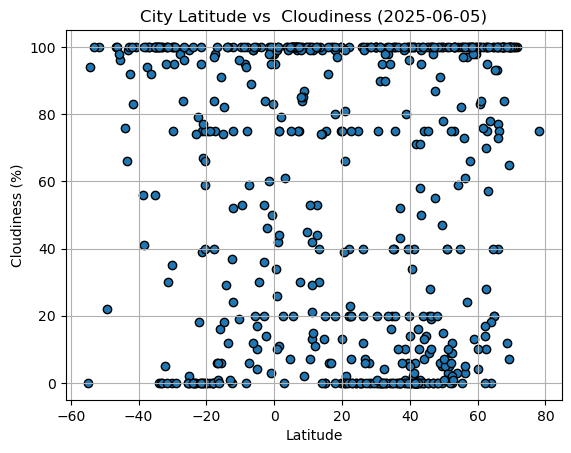

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Cloudiness (2025-06-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

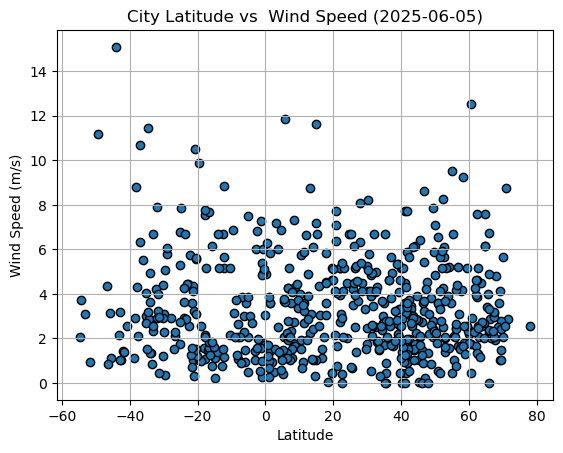

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Wind Speed (2025-06-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    # Creates a scatter plot with linear regression line and shows the R-squared value.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.3f}"

    plt.scatter(x_values,y_values, edgecolor='black', marker="o")
    plt.plot(x_values,regress_values,"r-")

    # Show line equation and R-squared on the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.annotate(line_eq, (x_values.min(), y_values.max()*0.65), fontsize=12, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max()*.55), fontsize=12, color="red")
    
    plt.title(title)
    
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
0                       nata   8.3333  -80.5167     27.65        85   
1        saint-jean-de-monts  46.7833   -2.0667     14.58        85   
2                     kodiak  57.7900 -152.4072      7.73        93   
3          wailua homesteads  22.0669 -159.3780     27.44        75   
5                     nemuro  43.3236  145.5750     12.71        91   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                84        2.75      PA  1749344705  
1                 0        8.63      FR  1749344706  
2               100        4.12      US  1749344707  
3                20        5.14      US  1749344709  
5                50        1.53      JP  1749344711

In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
4            tocopilla -22.0920  -70.1979     18.49        76          18   
6                 kone -21.0595  164.8658     25.67        43          67   
7              chonchi -42.6128  -73.8092      8.95        92          92   
8             waitangi -43.9535 -176.5597     11.37        87          76   
9        port mathurin -19.6833   63.4167     24.31        57           0   

         Wind Speed Country        Date  
City_ID                                  
4              5.76      CL  1749344483  
6              0.32      NC  1749344712  
7              1.01      CL  1749344713  
8             15.09      NZ  1749344714  
9              9.89      MU  1749344716

###  Temperature vs. Latitude Linear Regression Plot

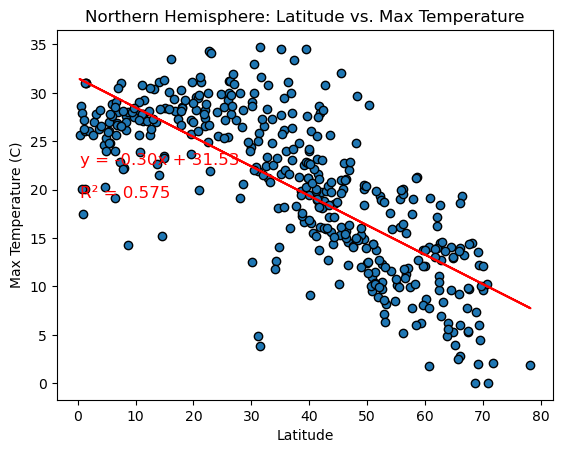

In [25]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Northern Hemisphere: Latitude vs. Max Temperature")

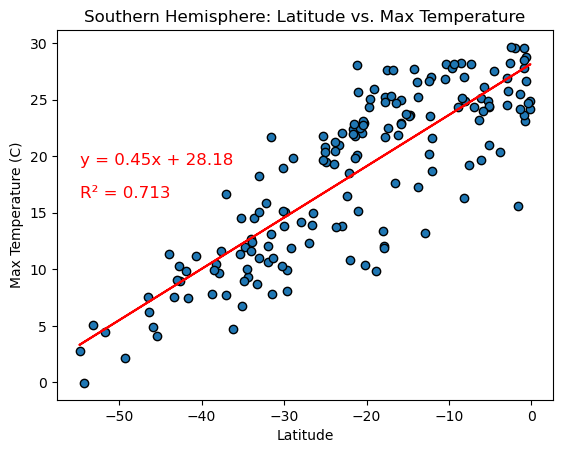

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion of the Linear Relationship:**  
* The scatter plots reveal a **negative correlation** between latitude and temperature in the **Northern Hemisphere**, where temperature **decreases as the latitude increases**.  
* In contrast, the **Southern Hemisphere** exhibits a **positive correlation**, where temperature **rises with latitude** 
* The strength of this correlation is reinforced by the **relatively high R² value,** suggesting a **consistent and predictable relationship**. 

### Humidity vs. Latitude Linear Regression Plot

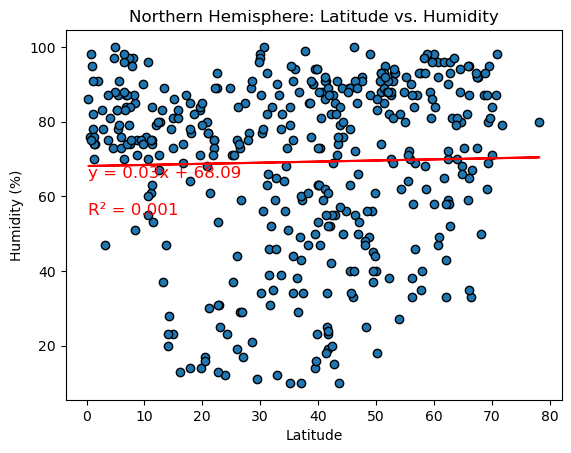

In [29]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Northern Hemisphere: Latitude vs. Humidity")

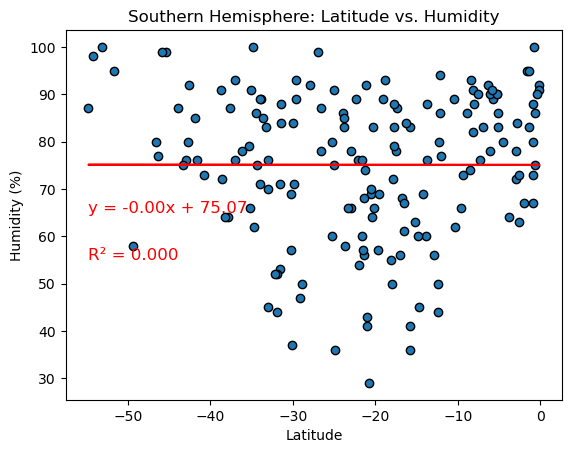

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Southern Hemisphere: Latitude vs. Humidity")

**Discussion of the Linear Relationship:**  
* Both scatter plots show **no clear correlation** between **latitude** and **humidity**.  
* The **R² values** are very low in both hemispheres, confirming that **latitude is not a significant factor in determining humidity levels**.  

### Cloudiness vs. Latitude Linear Regression Plot

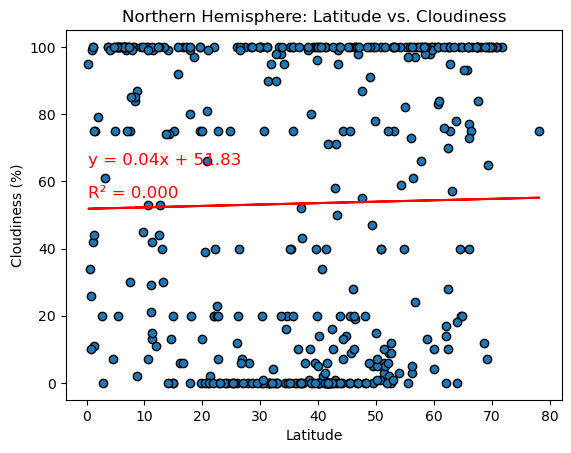

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Northern Hemisphere: Latitude vs. Cloudiness")

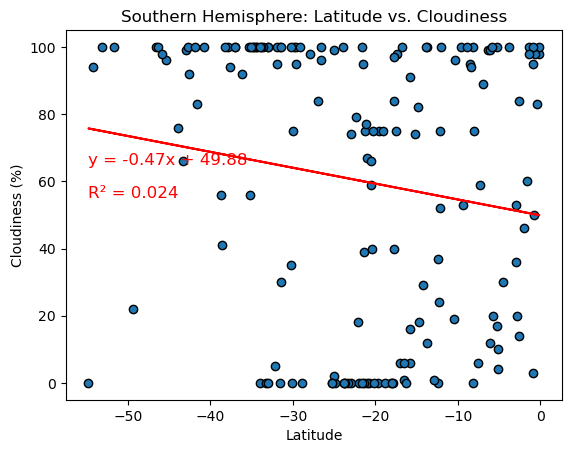

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Southern Hemisphere: Latitude vs. Cloudiness")


**Discussion of the Linear Relationship:**  
* The scatter plots in both **hemispheres** show **no clear relationship** between latitude and cloudiness.  
* The **R² values** are very low, confirming that **latitude is not a reliable predictor** of cloud cover.  

### Wind Speed vs. Latitude Linear Regression Plot

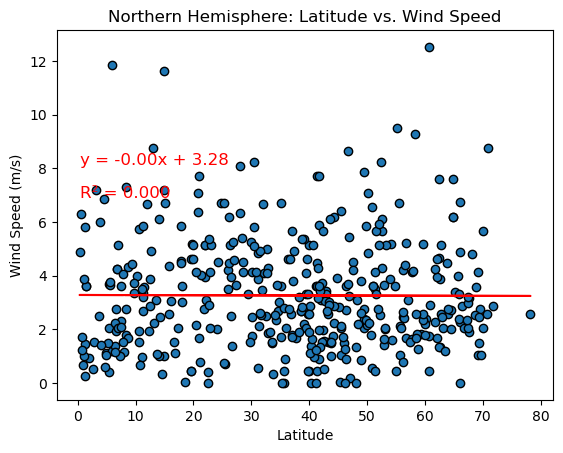

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Northern Hemisphere: Latitude vs. Wind Speed")

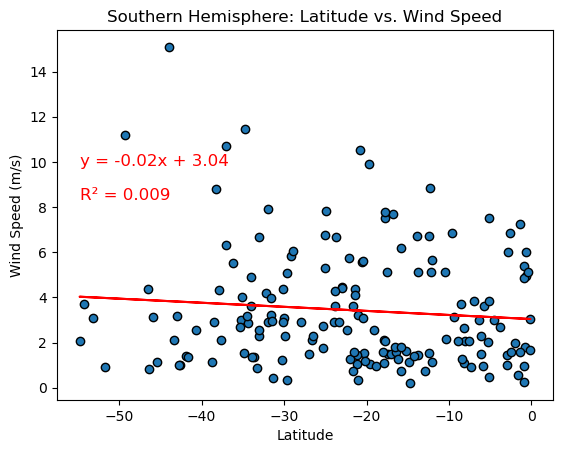

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion of the Linear Relationship:**  
* The scatter plots for both **hemispheres** show **no clear correlation** between latitude and wind speed.  
* Both exhibit very low **R² values**, indicating that **latitude is not a significant factor in determining wind speed**.  